In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.structured import *
from fastai.imports import *
from fastai.tabular import *
import seaborn as sns


In [0]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

In [0]:
path = Path('titanic')
path.ls()

[WindowsPath('titanic/gender_submission.csv'),
 WindowsPath('titanic/test.csv'),
 WindowsPath('titanic/train.csv')]

In [0]:
df = pd.read_csv(f'{path}/train.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


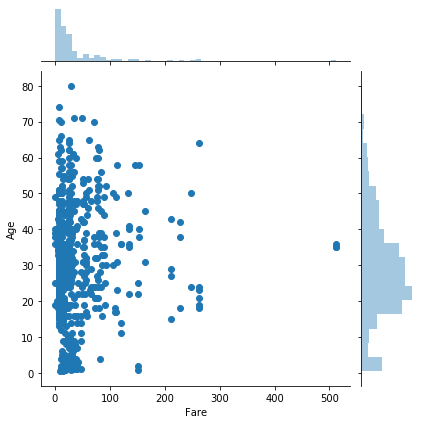

In [0]:
sns.jointplot(x='Fare',y='Age',data=df)

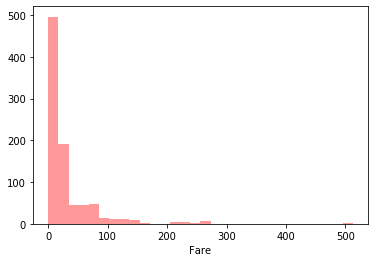

In [0]:
sns.distplot(df['Fare'],bins=30,kde=False,color='red')

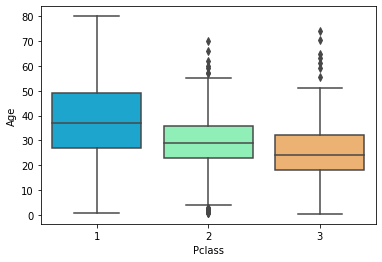

In [0]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

C:\Users\devsa\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\devsa\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


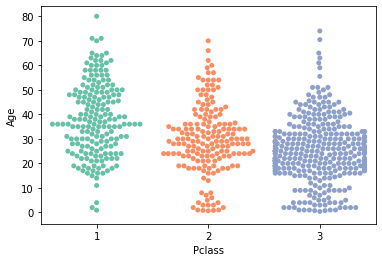

In [0]:
sns.swarmplot(x='Pclass',y='Age',data=df,palette='Set2')

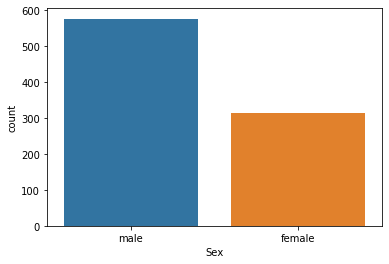

In [0]:
sns.countplot(x='Sex',data=df)

Text(0.5, 1, 'titanic.corr()')

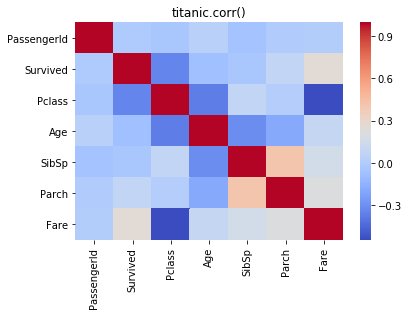

In [0]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

In [0]:
#missing Data

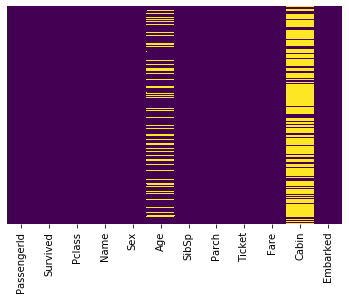

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train_cats(df)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)

In [0]:
for train_idx,val_idx in split.split(df,df['Pclass']):
    df_train = df.loc[train_idx]
    df_val = df.loc[val_idx]

In [0]:
df_train.shape,df_val.shape,df.shape

((712, 12), (179, 12), (891, 12))

In [0]:
print('1',df_train['Pclass'][df_train['Pclass'] == 1].count())
print('2',df_train['Pclass'][df_train['Pclass'] == 2].count())
print('3',df_train['Pclass'][df_train['Pclass'] == 3].count())

1 173
2 147
3 392


In [0]:
print('1',df_val['Pclass'][df_val['Pclass'] == 1].count())
print('2',df_val['Pclass'][df_val['Pclass'] == 2].count())
print('3',df_val['Pclass'][df_val['Pclass'] == 3].count())

1 43
2 37
3 99


In [0]:
df_1 = df.drop('Cabin',axis=1)
for train_idx,val_idx in split.split(df_1,df_1['Pclass']):
    df_1train = df_1.loc[train_idx]
    df_1val = df_1.loc[val_idx]

In [0]:
X_train,y_train,nas = proc_df(df_train,y_fld='Survived')
X_val,y_val,nas_val = proc_df(df_val,y_fld='Survived')


In [0]:
X_train_1,y_train_1,nas = proc_df(df_1train,y_fld='Survived')
X_val_1,y_val_1,nas = proc_df(df_1val,y_fld='Survived')

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
def metrics(m):
    print('training error',accuracy_score(y_train_1,m.predict(X_train_1)))
    print('Val Error',accuracy_score(y_val_1,m.predict(X_val_1)))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [0]:
rfc = RandomForestClassifier(n_jobs=-1)
Kneigh = KNeighborsClassifier()
log_reg = LogisticRegression()

In [0]:
rfc.fit(X_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
metrics(rfc)

training error 0.9943820224719101
Val Error 0.8044692737430168


In [0]:
Kneigh.fit(X_train_1,y_train_1)
metrics(Kneigh)

training error 0.7598314606741573
Val Error 0.6256983240223464


In [0]:
log_reg.fit(X_train_1,y_train_1)
metrics(log_reg)

C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training error 0.7963483146067416
Val Error 0.7932960893854749


In [0]:
svc = SVC(max_iter=100)

In [0]:
%%time
svc.fit(X_train_1,y_train_1)
metrics(svc)

C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


training error 0.6264044943820225
Val Error 0.4972067039106145
Wall time: 42 ms


In [0]:
param_grid = {'n_estimators': [50,100,150],'max_depth':[2,3,4,None],'min_samples_split':[0.2,0.4,2]}
grid = GridSearchCV(rfc,param_grid,cv=3,n_jobs=-1)
grid.fit(X_train_1,y_train_1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn

In [0]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
rfc = grid.best_estimator_
rfc.fit(X_train_1,y_train_1)
metrics(rfc)

training error 1.0
Val Error 0.8435754189944135


In [0]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=200)
rfc.fit(X_train_1,y_train_1)
metrics(rfc)

training error 1.0
Val Error 0.8491620111731844


In [0]:
KNeighborsClassifier()
param_grid = {'n_neighbors':[1,2,3,4,5,10]}
grid = GridSearchCV(Kneigh,param_grid,n_jobs=-1)
grid.fit(X_train_1,y_train_1)

C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
metrics(grid.best_estimator_)
kneigh = grid.best_estimator_


training error 0.7626404494382022
Val Error 0.6201117318435754


In [0]:
SVC()


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
param_grid= {'C':[0.01,0.1,1,5],'kernel':['rbf','poly','sigmoid']}
grid = GridSearchCV(svc,param_grid,n_jobs=-1)
grid.fit(X_train_1,y_train_1)

C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\devsa\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=100,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
metrics(grid.best_estimator_)
grid.best_estimator_

training error 0.6264044943820225
Val Error 0.4972067039106145


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=100, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=100, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train_1,y_train_1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
metrics(nb)

training error 0.7893258426966292
Val Error 0.7821229050279329


In [0]:
vot_clf = VotingClassifier(estimators=[('kn',kneigh),('rf',rfc),('sv',svc),('lr',log_reg),('nbay',nb)],n_jobs=-1,voting='soft')
vot_clf.fit(X_train_1,y_train_1)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=4,
                                                   p=2, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_d

In [0]:
metrics(vot_clf)


training error 0.8960674157303371
Val Error 0.8212290502793296


In [0]:
metrics(vot_clf)


training error 0.9157303370786517
Val Error 0.8156424581005587
